In [1]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix


In [16]:

dataset_path = "/content/drive/MyDrive/Data/17Flowers/train"


idg=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.8,1.2),
    zoom_range=0.1,
    shear_range=0.3,
    rotation_range=10,
    validation_split=0.2

)

train_data=idg.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    subset='training',

)
val_data=idg.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    subset='validation',

)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


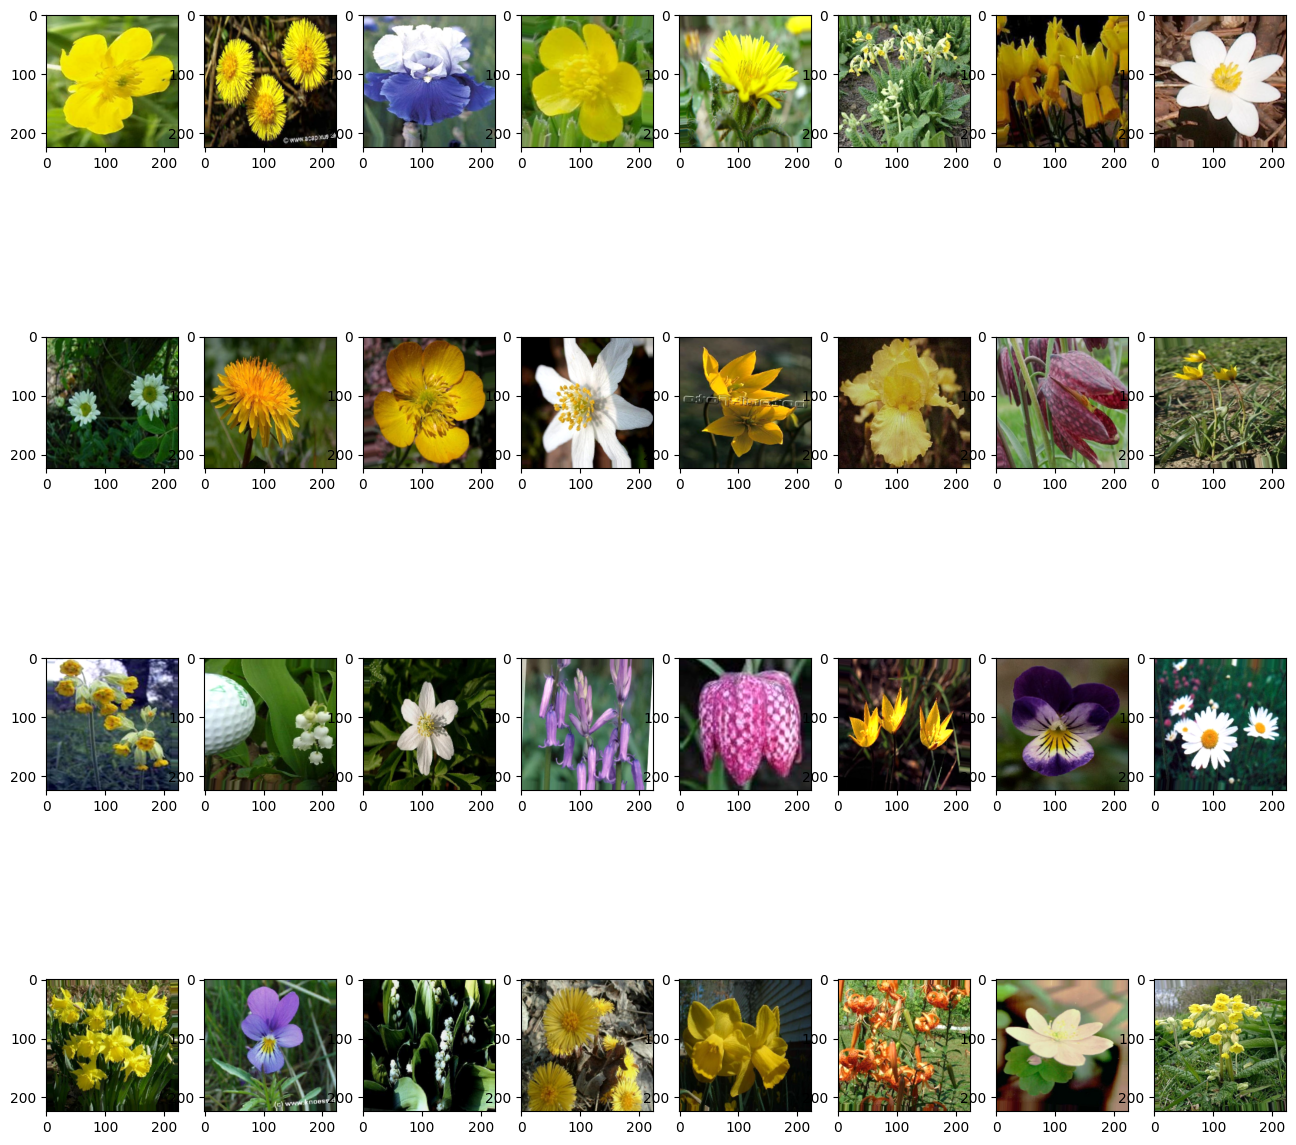

In [4]:

some_images=next(train_data)
X=some_images[0]
Y=some_images[1]

plt.figure(figsize=(16,16))
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(X[i])


In [6]:
model = tf.keras.models.Sequential([
  layers.Conv2D(16,(3,3),activation='relu',strides=(2, 2),input_shape=(224,224,3)),
  layers.Conv2D(32,(3,3),activation='relu',strides=(2, 2)),
  layers.MaxPool2D(),
  layers.Conv2D(64,(5,5),activation='relu',strides=(2, 2)),
  layers.Conv2D(256,(3,3),activation='relu',strides=(2, 2)),
  layers.MaxPool2D(),
  layers.Flatten(),
  layers.Dense(512,activation='relu'),
  layers.Dense(64,activation='relu'),
  layers.Dense(17,activation='softmax')
])

In [7]:

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 111, 111, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 256)         147712    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 256)         0         
 g2D)                                                   

In [9]:
plt_model = model.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
26/26 [==============================] - 209s 8s/step - loss: 2.7347 - accuracy: 0.0887 - val_loss: 2.4912 - val_accuracy: 0.0964
Epoch 2/20
26/26 [==============================] - 17s 677ms/step - loss: 2.4676 - accuracy: 0.1397 - val_loss: 2.3547 - val_accuracy: 0.1726
Epoch 3/20
26/26 [==============================] - 19s 754ms/step - loss: 2.3129 - accuracy: 0.1871 - val_loss: 2.0923 - val_accuracy: 0.2284
Epoch 4/20
26/26 [==============================] - 19s 758ms/step - loss: 2.0923 - accuracy: 0.2855 - val_loss: 1.8941 - val_accuracy: 0.3503
Epoch 5/20
26/26 [==============================] - 18s 681ms/step - loss: 1.9654 - accuracy: 0.3086 - val_loss: 1.7760 - val_accuracy: 0.3503
Epoch 6/20
26/26 [==============================] - 18s 692ms/step - loss: 1.9590 - accuracy: 0.3378 - val_loss: 1.7106 - val_accuracy: 0.4518
Epoch 7/20
26/26 [==============================] - 18s 681ms/step - loss: 1.7482 - accuracy: 0.3900 - val_loss: 1.5901 - val_accuracy: 0.4112
E

In [11]:

test_dataset_path = '/content/drive/MyDrive/Data/17Flowers/test'
width=height = 224
batch_size = 32
idg = ImageDataGenerator(
    rescale = 1./255,
)


test_data = idg.flow_from_directory(
    test_dataset_path,
    target_size = (width,height),
    class_mode = "categorical",
    batch_size = batch_size,
)

Found 340 images belonging to 17 classes.


In [12]:
model.evaluate(test_data)

11/11 [==============================] - 62s 6s/step - loss: 1.2289 - accuracy: 0.6382


[1.228886365890503, 0.6382352709770203]

In [13]:
model.save("17_Flowers.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 2s 189ms/step


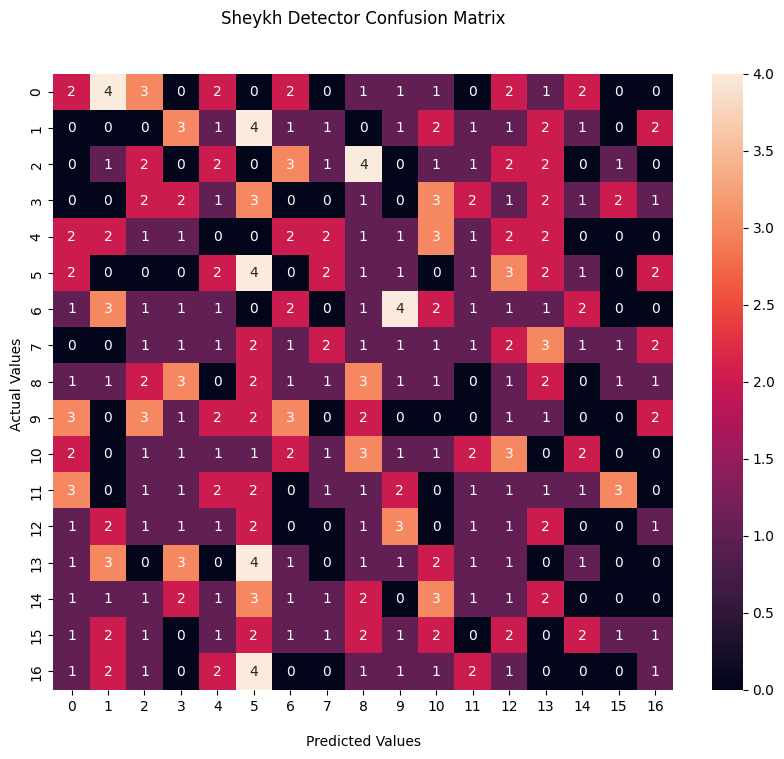

In [22]:
import seaborn as sns

Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
conf_mat = confusion_matrix(test_data.classes, y_pred)

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(conf_mat, annot=True)
ax.set_title('Sheykh Detector Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

plt.show()